<a href="https://colab.research.google.com/github/mohmaed7777/Support-Vector-Machine-with-sklearn/blob/main/SVM_for_Wine_Quality_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import sklearn
print('Setup Complete!')

Setup Complete!


In [2]:
wine_data = '/content/RcYG8M5XQICGBvDOV4CAsQ_bf36d9e4cbbf4d5cbb2528b965b4fef4_Wine_Quality_Data.csv'
df = pd.read_csv(wine_data, sep=',')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

Text(0.5, 0, 'color')

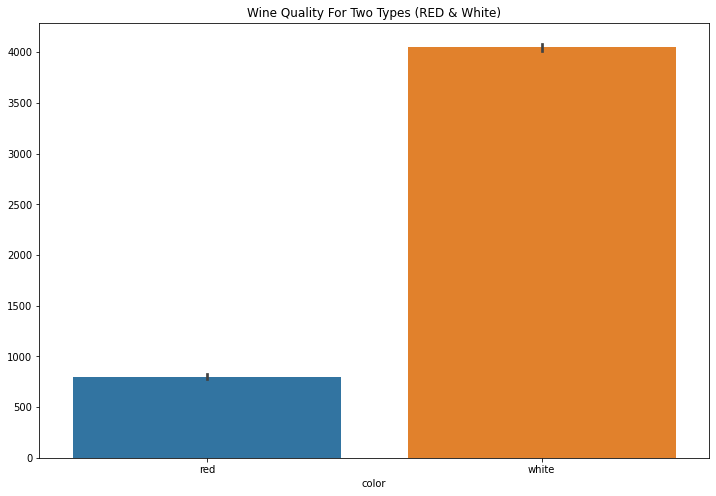

In [4]:
plt.figure(figsize=(12, 8))
plt.title('Wine Quality For Two Types (RED & White)')
sns.barplot(x=df['color'],y=df.index )
plt.xlabel('color')

In [5]:
y = (df['color']== 'red').astype(int)
filds = list(df.columns[:-1])
correlation = df[filds].corrwith(y)
correlation.sort_values(inplace=True)
correlation

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

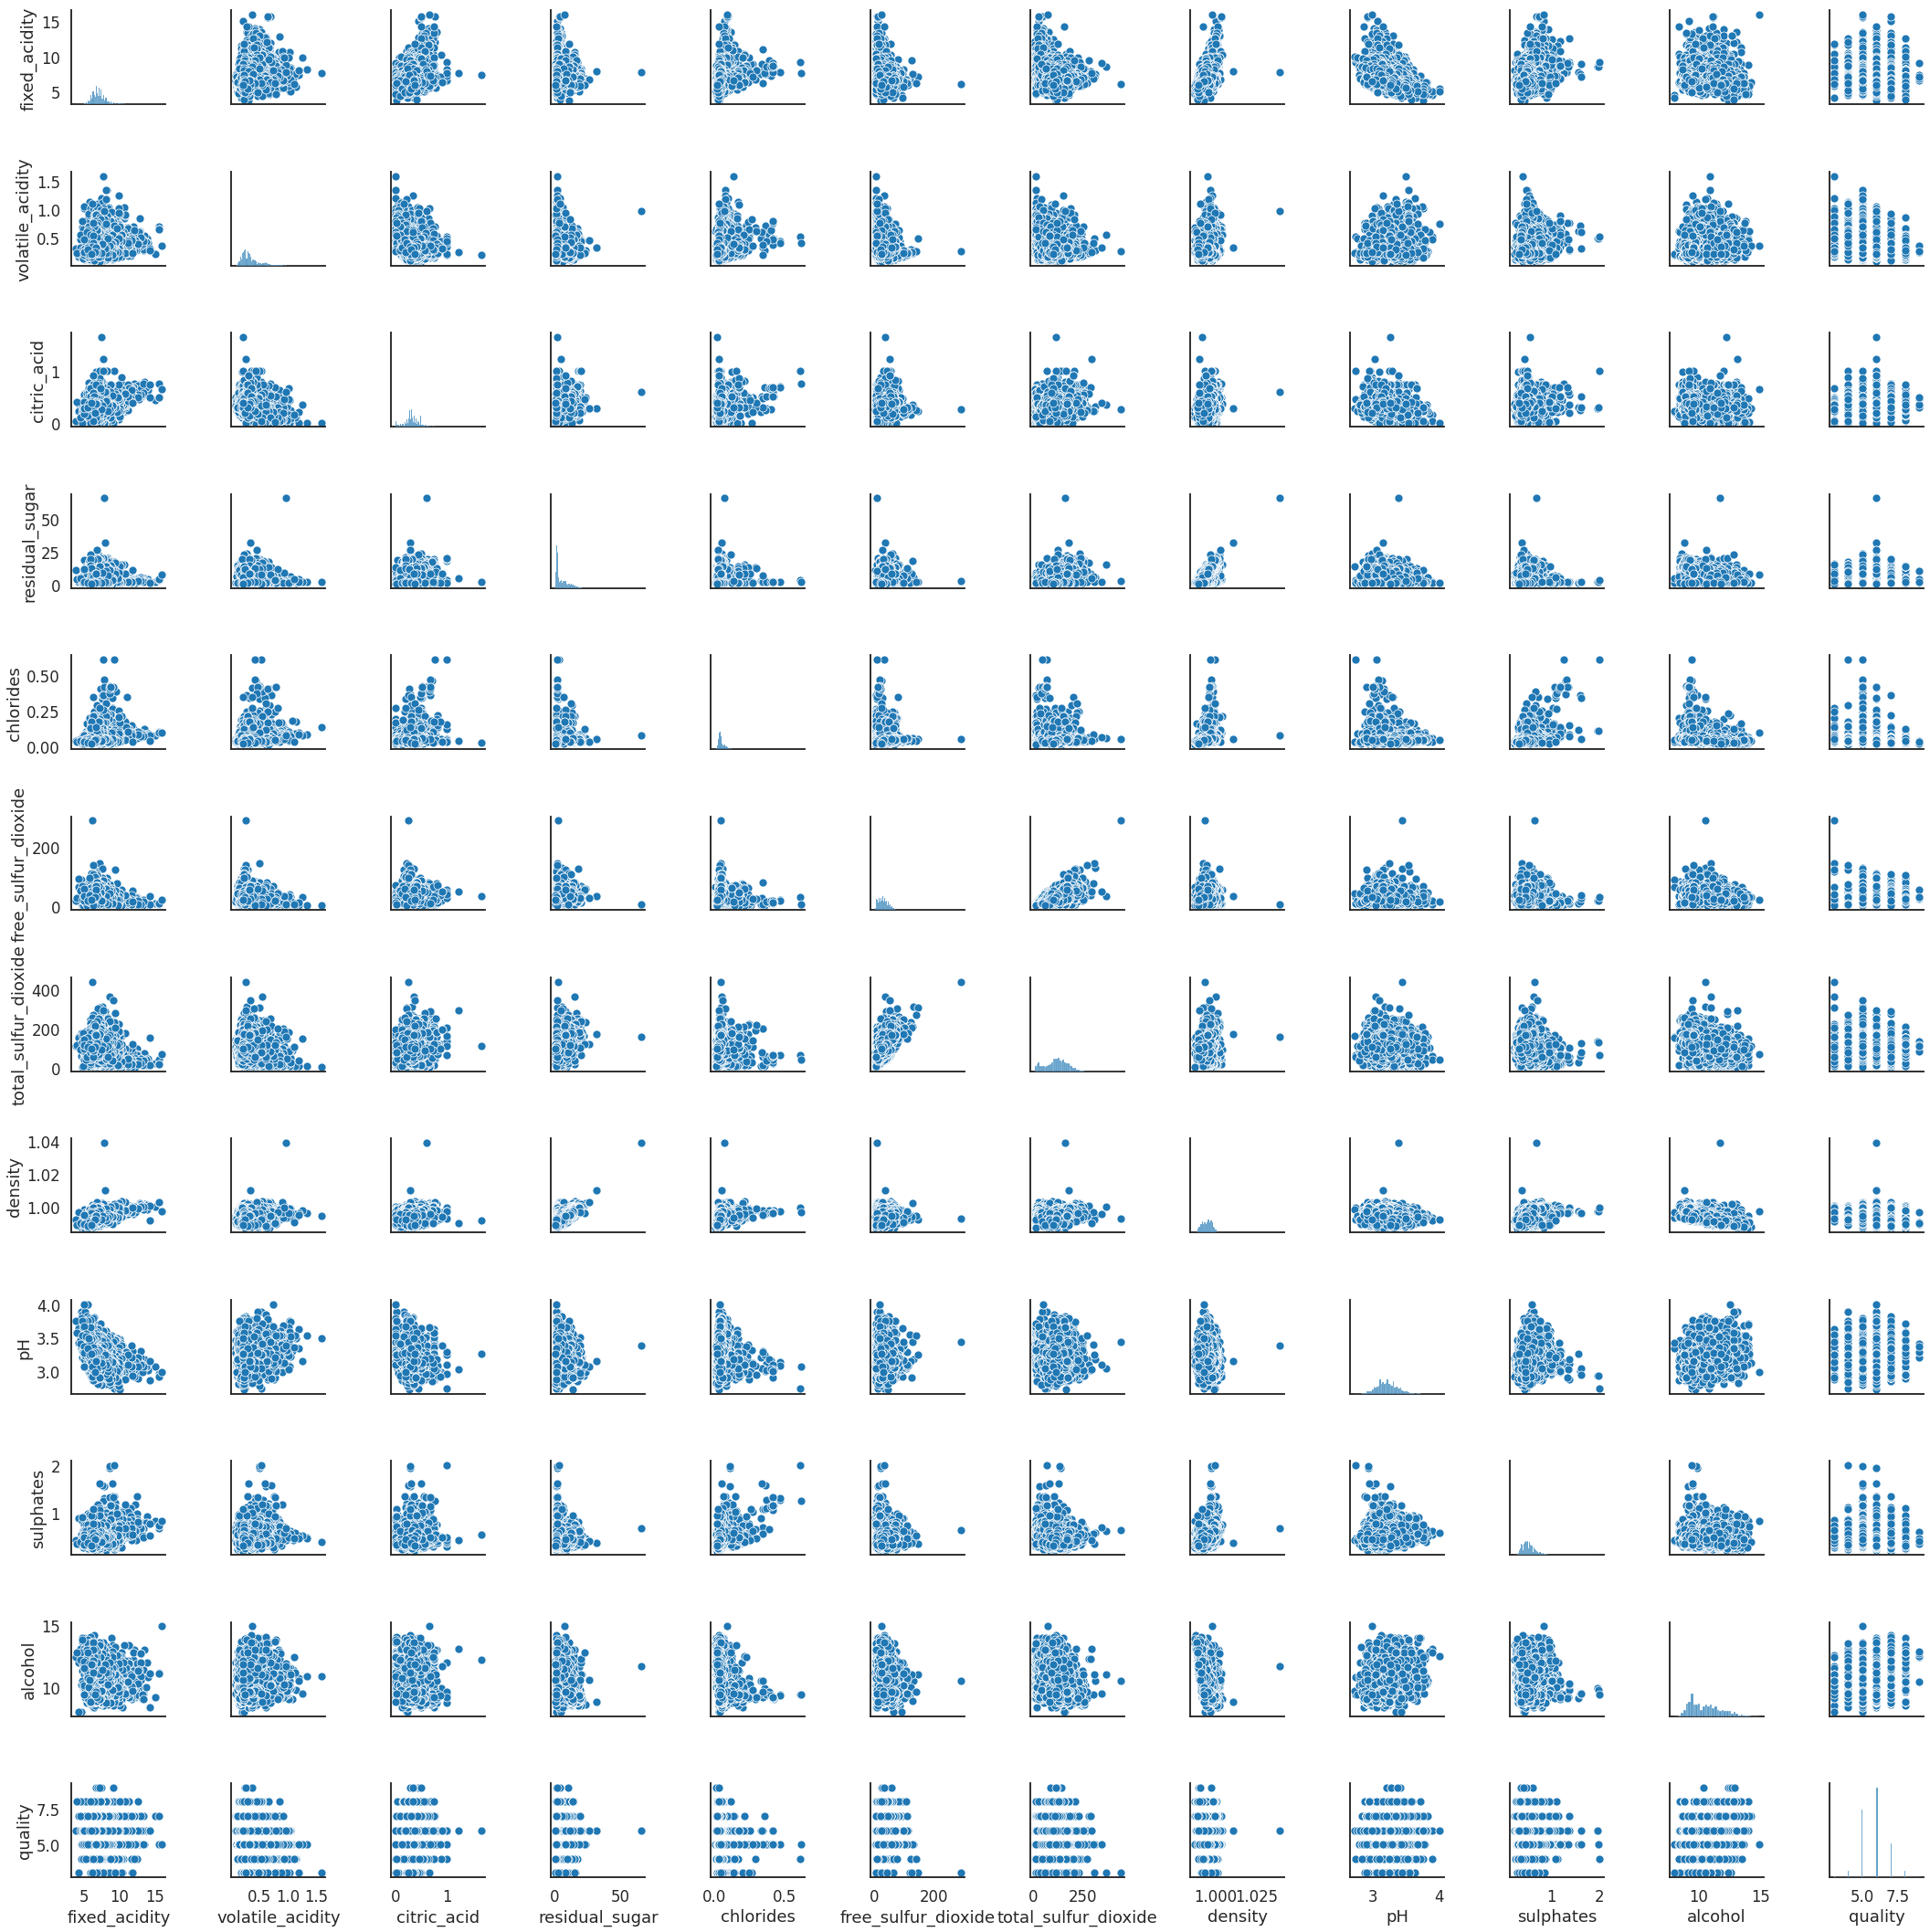

In [9]:
# Create a pairplot :
sns.set_context('talk')
#sns.set_palette('palette')
sns.set_style('white')
sns.pairplot(df)


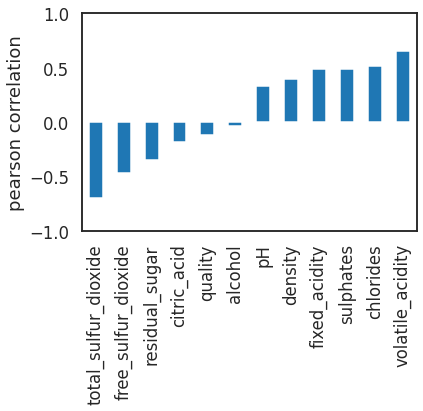

In [10]:
# Create a barplot showing the correlation between each column and Y: 
ax = correlation.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [12]:
# Scale the highist correlated Values : 
from sklearn.preprocessing import MinMaxScaler
fields = correlation.map(abs).sort_values().iloc[-2:].index
print(fields)
x = df[fields]
scalar = MinMaxScaler()
x = scalar.fit_transform(x)
x = pd.DataFrame(x , columns=['%s_scaled' % fld for fld in fields])
print(x.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


**Linear Decision Boundary:**